Reuse Fiatlight widgets
=======================

Fiatlight widgets can be reused in your own applications created with [Dear ImGui Bundle](https://pthom.github.io/imgui_bundle/), not only in Fiatlight's functions graphs.

To achieve this, you can use the `fl.immediate_edit` function, which is a simple way to create a GUI for editing a single value:
it returns a tuple `(changed, new_value)` where `changed` is a boolean indicating whether the value was changed by the user, and `new_value` is the new value.


Reuse a Pydantic model GUI in a standalone application
-------------------------------------------------------
In the example below, we use the `fl.immediate_edit` function to create a simple GUI for editing a Pydantic model.

Since the model has a validator `fl.immediate_edit` will only return the new value if the validator passes, otherwise
the user may continue to edit the value until it is valid.

> See also: *complete doc for [pydantic and dataclasses GUI generation](manual_dataclass_models)*

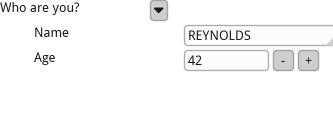

In [3]:
import fiatlight as fl
from pydantic import BaseModel
from imgui_bundle import hello_imgui

def all_caps_validator(value: str) -> str:
    if value != value.upper():
        raise ValueError("Name must be in all caps")
    return value

@fl.base_model_with_gui_registration(
    name__label="Name",
    age__label="Age",
    name__validator=all_caps_validator,
)
class MyModel(BaseModel):
    name: str = "REYNOLDS"
    age: int = 42

MY_MODEL = MyModel()

def gui():
    global MY_MODEL
    _changed, MY_MODEL = fl.immediate_edit("Who are you?", MY_MODEL)

hello_imgui.run(gui)

Reuse a basic widget in a standalone application
------------------------------------------------

In the example below, we use the `fl.immediate_edit` function to create a simple GUI for editing an integer and a float value.

We use fiat_attributes to customize the widgets.

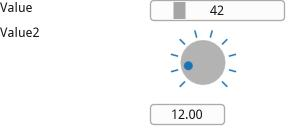

In [4]:
from imgui_bundle import hello_imgui
import fiatlight as fl

INT_VALUE = 42
FLOAT_VALUE = 12.0

def gui():
    global INT_VALUE, FLOAT_VALUE, NAME, COMMENT

    # Edit a simple value using fiatlight (here we edit an int)
    _changed, INT_VALUE = fl.immediate_edit(
        "Value",
        INT_VALUE,
        edit_type="slider",
        slider_logarithmic=True,
        tooltip= "Enter value",
        range=(1, 1000_000_000),
    )

    _, FLOAT_VALUE = fl.immediate_edit(
        "Value2",  # Error: same label used twice (Fiatlight should raise an understandable error)
        FLOAT_VALUE,
        edit_type="knob",
        knob_steps=10,
        range=(0, 100),
        knob_size_em=5
    )

hello_imgui.run(gui)